## Project/ Business Goals
* Understand about the data
* Create various Time Series models for the Sales forecasting
* Create all the models suitable for this purpose and compare these models

In [1]:
# Importing the required library

# Numpy and Pandas
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

# Models
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Box Test
import statsmodels.api as sm

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Data imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# For seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# For triple exp Smoothing
from statsmodels.tsa.api import ExponentialSmoothing

# To Check Stationarity Adfuller method
from statsmodels.tsa.api import adfuller

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls')
df.tail(15)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9979,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,1,0.0,22.3548
9981,9982,CA-2017-163566,2017-08-03,2017-08-06,First Class,TB-21055,Ted Butterfield,Consumer,United States,Fairfield,...,45014,East,OFF-LA-10004484,Office Supplies,Labels,Avery 476,16.520,5,0.2,5.3690
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9983,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [3]:
df[df.columns[1]].count

<bound method Series.count of 0       CA-2016-152156
1       CA-2016-152156
2       CA-2016-138688
3       US-2015-108966
4       US-2015-108966
             ...      
9989    CA-2014-110422
9990    CA-2017-121258
9991    CA-2017-121258
9992    CA-2017-121258
9993    CA-2017-119914
Name: Order ID, Length: 9994, dtype: object>

* The data seems to have two date columns **Order-date,Ship-date** 
* Lets use Order date which can be used to understand number of orders 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### EDA

### Univariate - Distribution of all the Numerical column

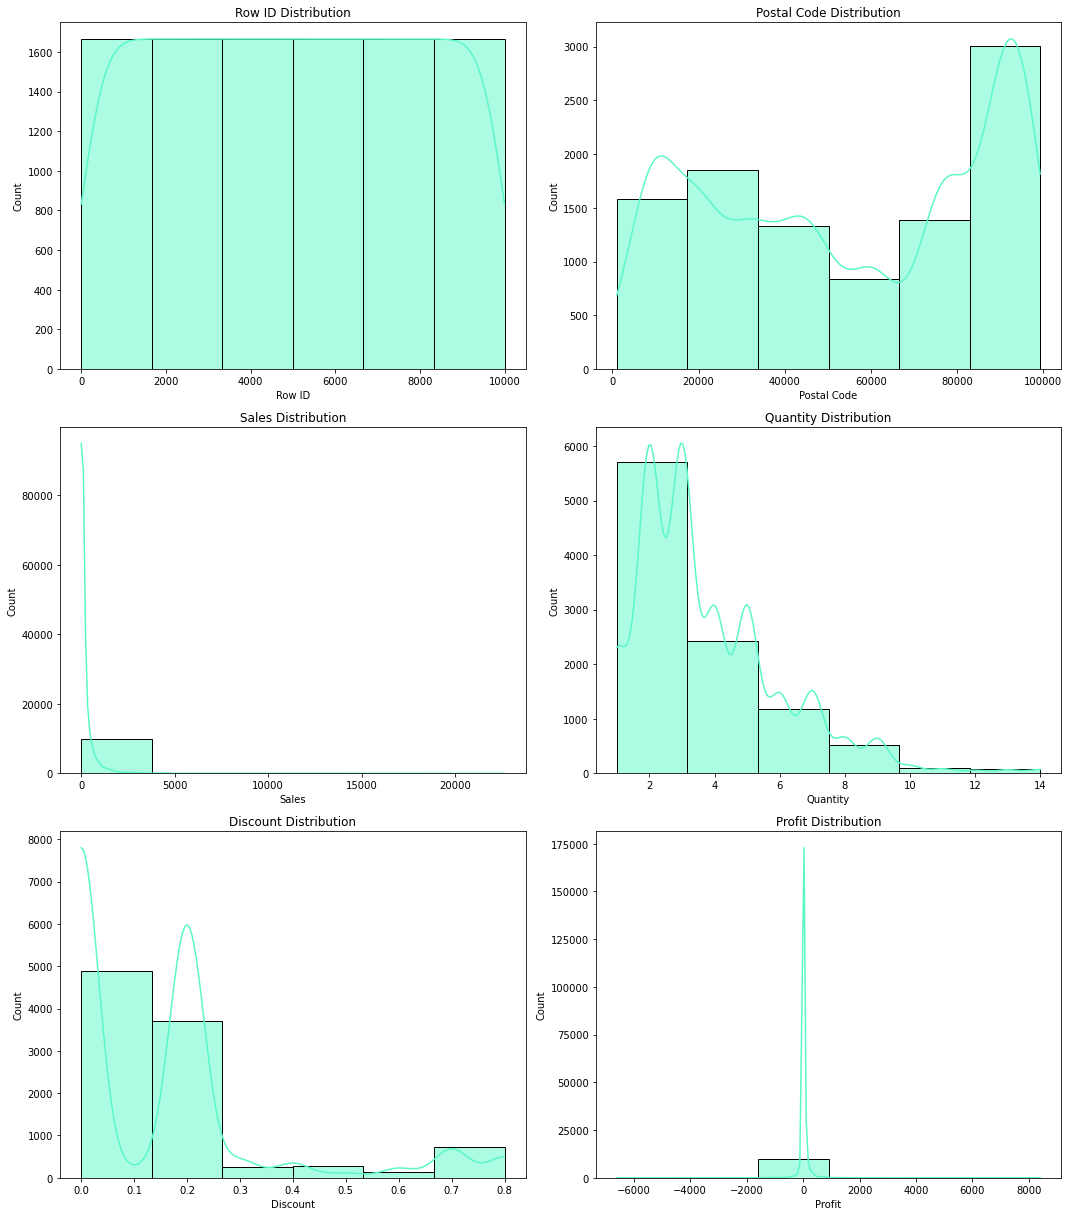

In [6]:
fig,ax = plt.subplots(figsize = (15,17))
color = sb.color_palette('rainbow')[2:3]

columns = ['Row ID','Postal Code','Sales','Quantity','Discount','Profit']
a = 1
for i in columns:
    plt.subplot(3,2,a)
    sb.histplot(x = df[i],color=color,kde=True,bins = 6)
    plt.title(f'{i} Distribution')
    a += 1

plt.tight_layout()
plt.show()

* The **distribution of all the numerical column** can be seen above
* **Sales** is **right skewed data**
* **Quantity** and **Discount** is also a **right skewed data**

### Univarite - Understanding about the outliers in Numerical data

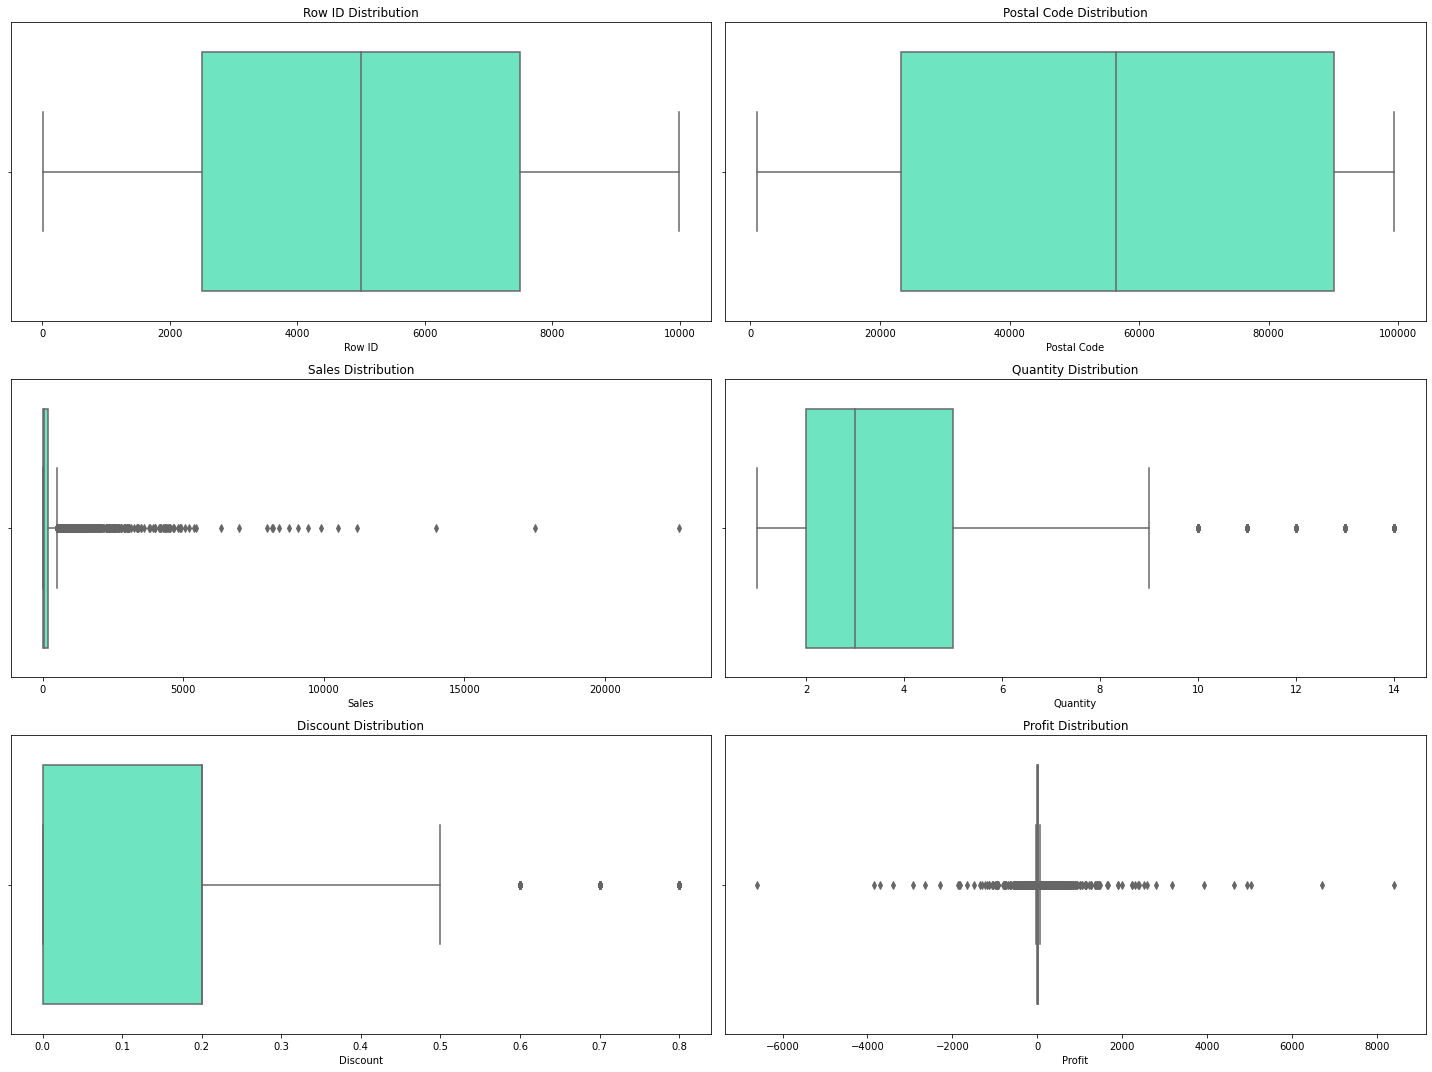

In [7]:
fig,ax = plt.subplots(figsize = (20,15))
color = sb.color_palette('rainbow')[2:3]

columns = ['Row ID','Postal Code','Sales','Quantity','Discount','Profit']
a = 1
for i in columns:
    plt.subplot(3,2,a)
    sb.boxplot(x = df[i],palette=color)
    plt.title(f'{i} Distribution')
    a += 1

plt.tight_layout()
plt.show()

* There are lot of outliers is present in the **Sales**
* All the other features like **Quantity,Discount,Profit** have outliers too

### Univariate - Categorical column

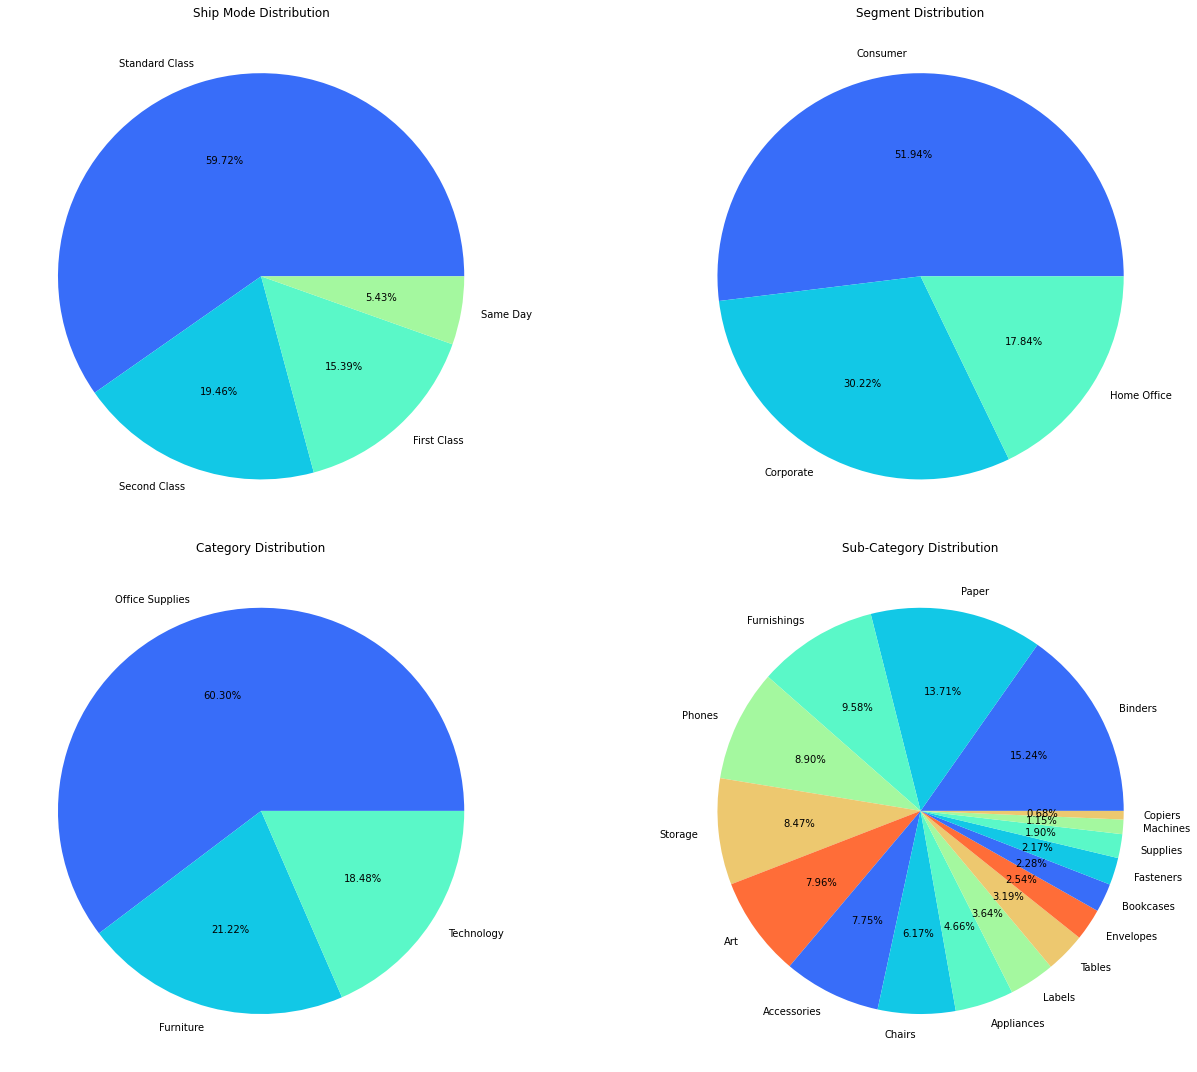

In [5]:
fig,ax = plt.subplots(figsize = (20,15))
columns_cat = ['Ship Mode','Segment','Category','Sub-Category']
b = 1

for i in columns_cat:
    plt.subplot(2,2,b)
    data = df[i].value_counts()
    label = data.keys()
    plt.pie(data,labels=label,autopct='%.2f%%',colors=sb.color_palette('rainbow'))
    plt.title(f'{i} Distribution')
    b += 1

plt.tight_layout()
plt.show()

* The distribution of some categorical data is provided in the above pie chart
* **Consumer segment** has more number of sales than other segments
* **Office supply** category products has more sales
* In that **Paper** sub-category contributes more to the sales

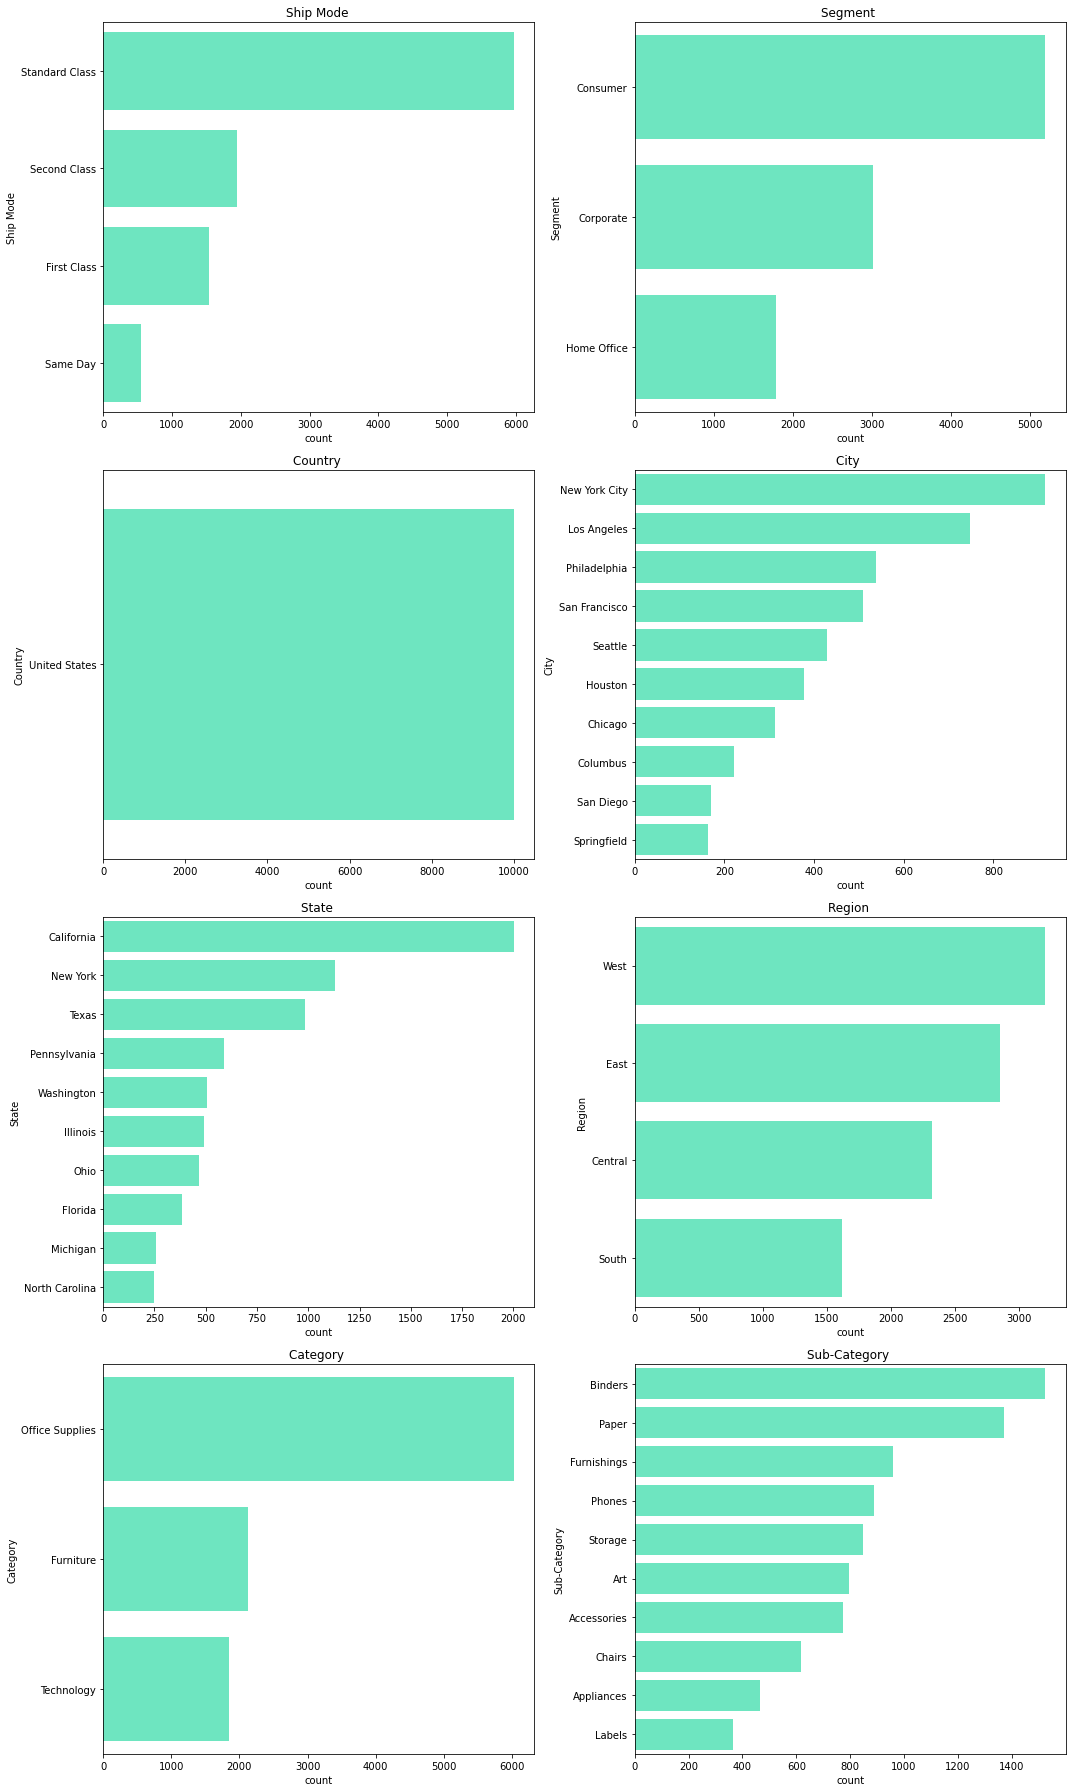

In [6]:
fig,ax = plt.subplots(figsize = (15,25))
columns = ['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category']
b = 1

for i in columns:
    plt.subplot(4,2,b)
    sb.countplot(y = df[i],palette=sb.color_palette('rainbow')[2:3],order = df[i].value_counts().index[:10])
    plt.title(f'{i} ')
    b += 1

plt.tight_layout()
plt.show()

* More people opt for **Standard class** shipping mode
* All the sales data is from the **United States**
* **New york** has more number of sales than other cities
* **California** has more number of sales than other states

In [10]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

### Bivariate Analysis of Categorical data over Sales

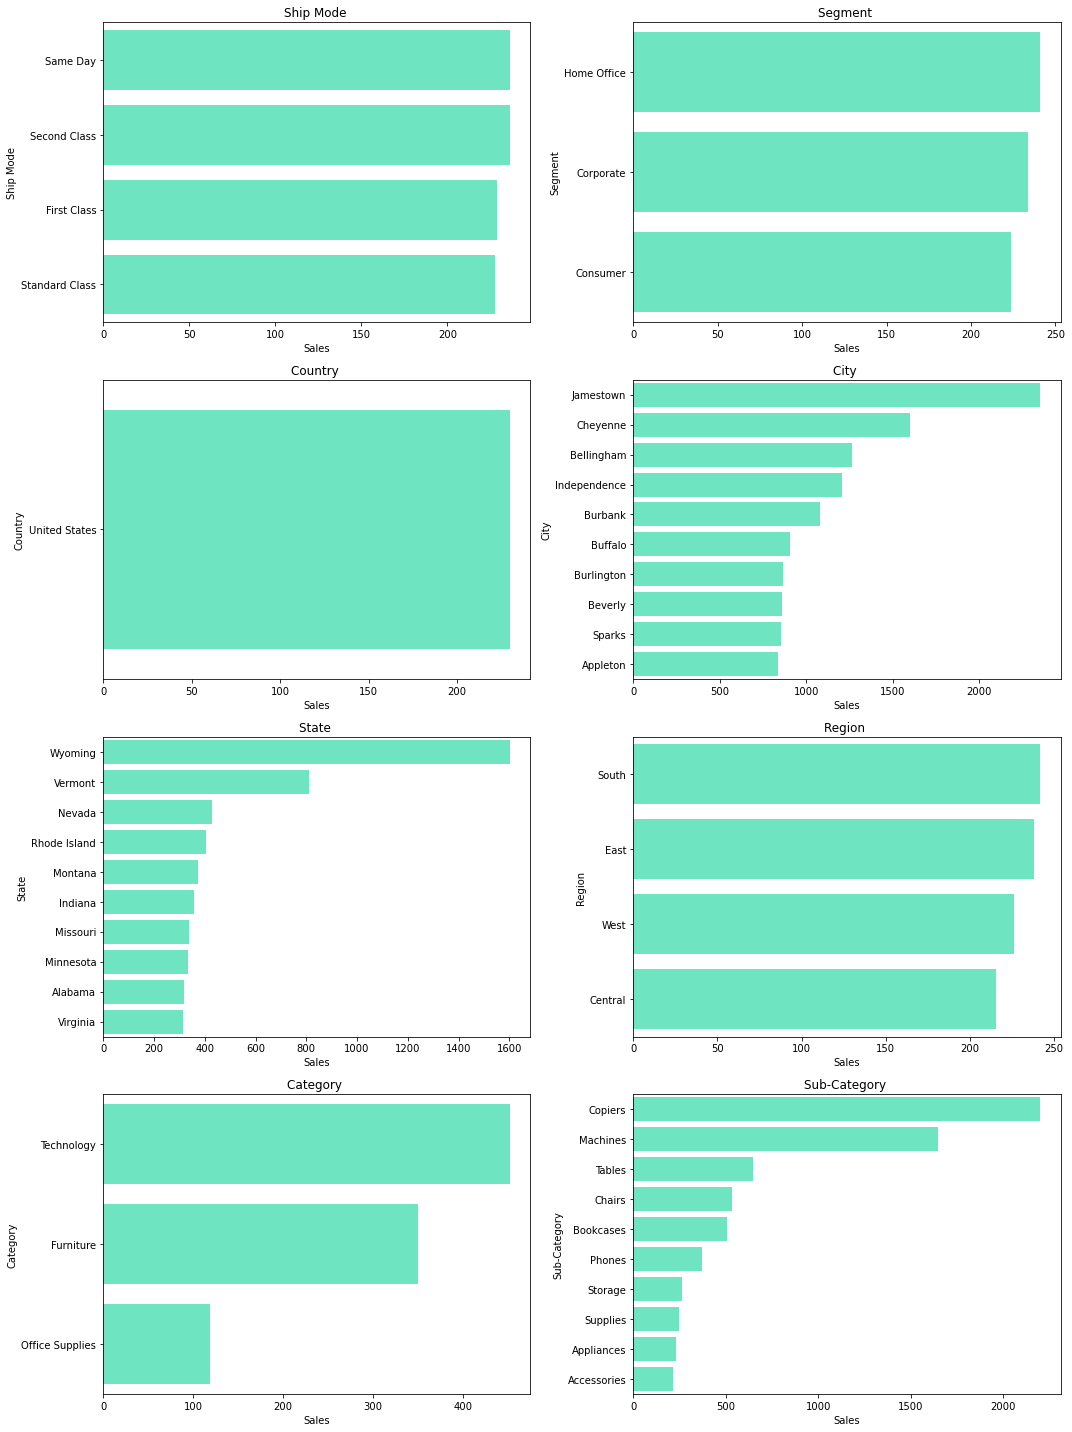

In [7]:
fig,ax = plt.subplots(figsize = (15,20))
columns = ['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category']

b = 1

for i in columns:
    plt.subplot(4,2,b)
    sb.barplot(y = df[i],x=df['Sales'],palette=sb.color_palette('rainbow')[2:3],
               order = df.groupby(i).mean().sort_values(by='Sales', ascending=False).index[:10],
               ci=False)
    plt.title(f'{i} ')
    b += 1

plt.tight_layout()
plt.show()

* **Same day shipment** makes more total sales
* **JamesTown** city has makes more total sales
* Total sales of **Technology** is more than the other categories
* **Copiers** makes smore total sales than other sub category

### Bivariate Analysis of Numerical data over Sales

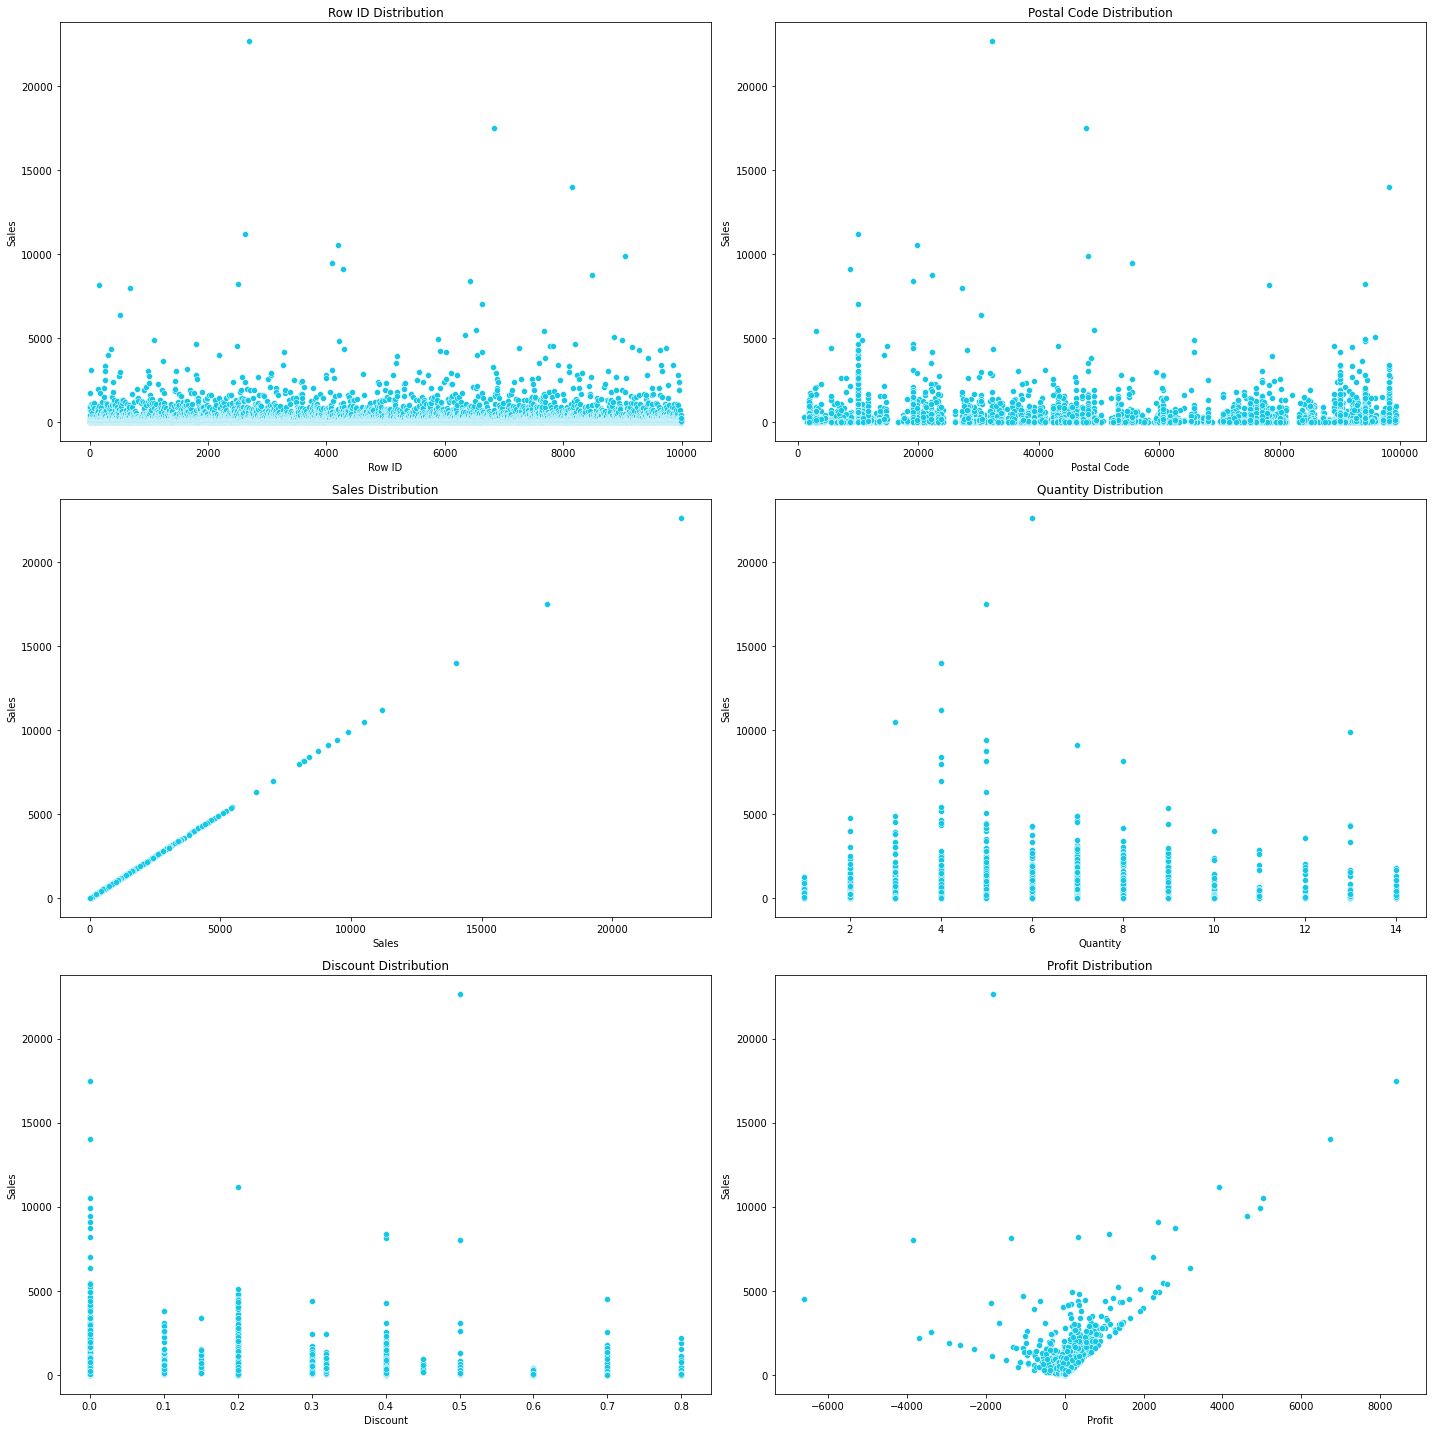

In [8]:
fig,ax = plt.subplots(figsize = (20,20))

numerics = ['Row ID','Postal Code','Sales','Quantity','Discount','Profit']
a = 1
for i in numerics:
    plt.subplot(3,2,a)
    sb.scatterplot(x = df[i],y=df['Sales'],color = sb.color_palette('rainbow')[1:2])
    plt.title(f'{i} Distribution')
    a += 1

plt.tight_layout()
plt.show()

* The distribution shows all numerical column over sales in plotted above
* As the **discount increases Sales decreases** that is if the **Sales is less then that makes the reason for more discount**
* Profit range is around **-2000 to 2000** for all the product

### Multivariate Analysis of Numerical columns upon Region

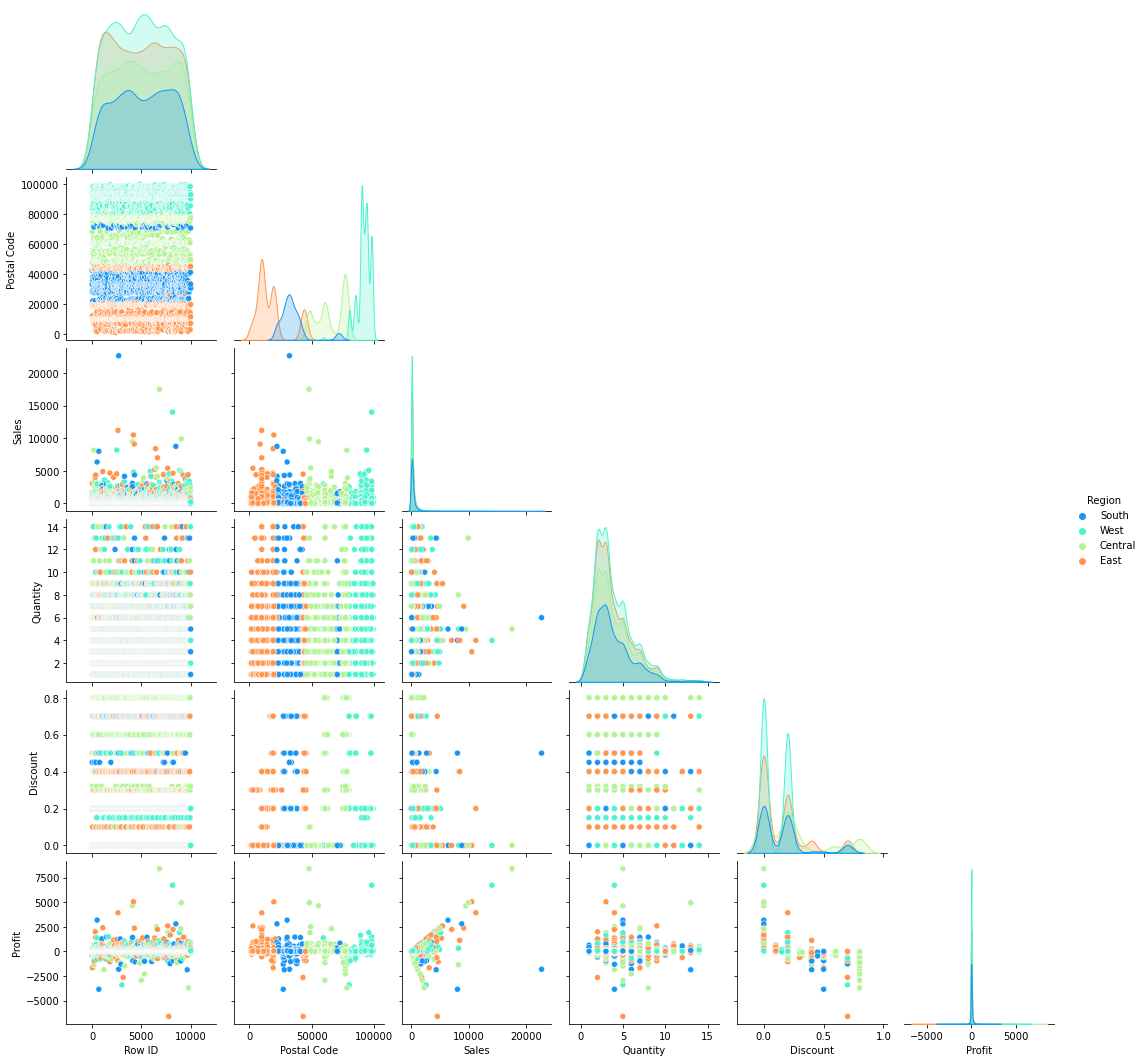

In [9]:
sb.pairplot(df,hue='Region',palette='rainbow',corner=True)
plt.show()

* The above plot shows the **Multivariate analysis of all numerical data based on Region**
* The region doesnt affect the sales as seen from the above plot
* The distribution cannot be segregated according to region because the data are overlapping more

### Data Preprocessing

#### Now lets re-arange the data according to the oder date

In [176]:
df1['Category'].unique

<bound method Series.unique of Order Date
2014-01-06    Furniture
2014-01-07    Furniture
2014-01-10    Furniture
2014-01-11    Furniture
2014-01-13    Furniture
                ...    
2017-12-29    Furniture
2017-12-29    Furniture
2017-12-29    Furniture
2017-12-29    Furniture
2017-12-30    Furniture
Name: Category, Length: 2121, dtype: object>

In [177]:
df1 = df.copy()

In [178]:
df1 = df1.loc[df1['Category'] == 'Furniture']

In [179]:
df1 = df1.sort_values(by='Order Date')
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7474,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
7660,7661,CA-2014-105417,2014-01-07,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
866,867,CA-2014-149020,2014-01-10,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
716,717,CA-2014-130092,2014-01-11,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2978,2979,CA-2014-109232,2014-01-13,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504


#### Now setting the order date as index in the dataframe

In [180]:
df1.set_index('Order Date',inplace=True)
df1.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-06,7475,CA-2014-167199,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
2014-01-07,7661,CA-2014-105417,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
2014-01-10,867,CA-2014-149020,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
2014-01-11,717,CA-2014-130092,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2014-01-13,2979,CA-2014-109232,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,South Carolina,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504


In [181]:
df1.dtypes

Row ID                    int64
Order ID                 object
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

* Since the order date column has **many data at the same day itself** we will try to convert this data into **Month data** so that the data is sequential

In [182]:
# Converting the data to monthwise data
df_week = df1.resample('W').mean()
df_week

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,,
2014-01-12,4180.000000,40453.500000,678.107000,3.750000,0.150000,179.268750
2014-01-19,4166.000000,49420.200000,250.094600,4.800000,0.310000,-50.800880
2014-01-26,4883.777778,51856.666667,183.995333,2.888889,0.022222,39.514033
2014-02-02,3581.000000,92364.000000,311.833000,2.500000,0.175000,-6.615200
2014-02-09,9267.000000,89031.000000,14.560000,2.000000,0.000000,5.532800
...,...,...,...,...,...,...
2017-12-03,5603.468750,55484.812500,500.255375,4.750000,0.190625,-5.583241
2017-12-10,4678.571429,43041.571429,314.085857,4.107143,0.121429,18.561386
2017-12-17,5272.947368,56105.631579,244.201000,3.000000,0.255263,-41.059174


* The data is resampled into **Weekly data**

In [183]:
df_week.isnull().sum()

Row ID         0
Postal Code    0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

* There are **no null values** in the dataset

### Univariate TimeSeries Analysis to forecast the Sales

### Visualizing the data

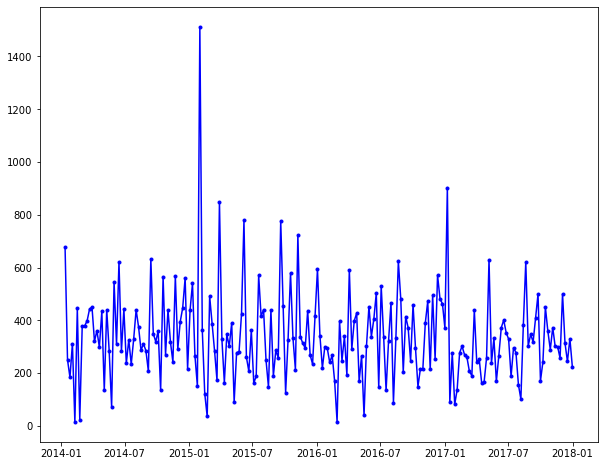

In [184]:
fig,ax = plt.subplots(figsize = (10,8))
plt.plot(df_week.Sales,marker = '.',c = 'blue')
plt.show()

* The graph shows the **Sales over the period**
* The data seems to be **stationary** and have some high peaks lets do some smoothing to the data

### Decomposing and Visualizing Data

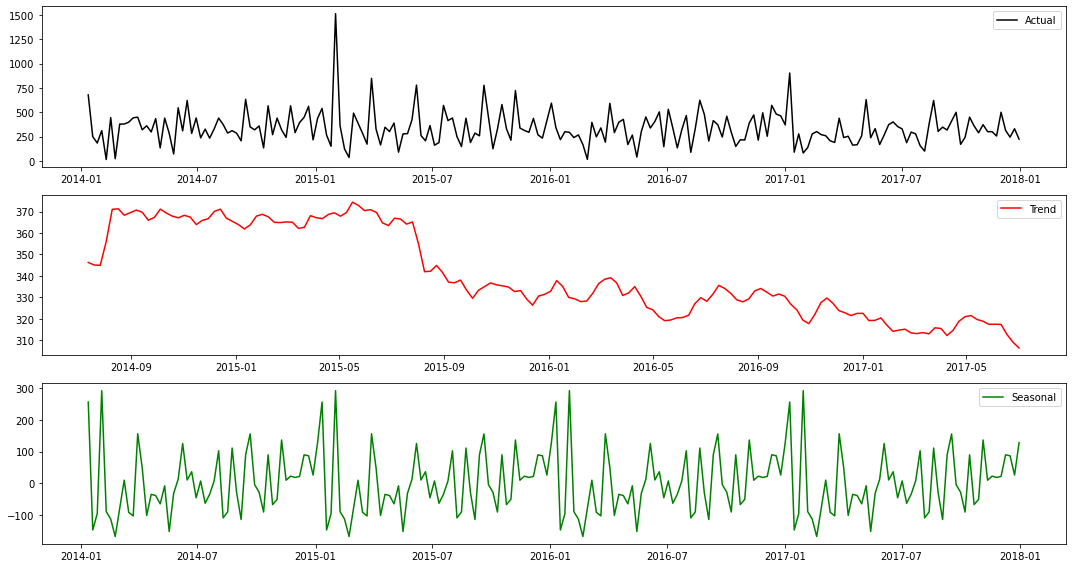

In [185]:
# Decomposing the data
decomp = seasonal_decompose(df_week.Sales,period=52)

d_sea = decomp.seasonal
d_tren = decomp.trend


fig,ax = plt.subplots(figsize = (15,8))


plt.subplot(311)
plt.plot(df_week.Sales,label = 'Actual',color = 'black')
plt.legend()

plt.subplot(312)
plt.plot(d_tren,label = 'Trend',color = 'r')
plt.legend()

plt.subplot(313)
plt.plot(d_sea,label = 'Seasonal',color = 'g')
plt.legend()



plt.tight_layout()
plt.show()

* The data seems to have **season** and **trend** in the data

### Since the data has season and tredn lets try with the Triple Exponential smoothing technique

In [186]:
# Triple exp smoothing

# Finding the best hyperparameters

def best_exp(data):
    alpha = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7,0.8,0.9]
    beta = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
    gamma = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
    mad = []
    mape = []
    al = []
    be =[]
    ga =[]

    for i in alpha:
        for j in beta:
            for k in gamma:
                m = ExponentialSmoothing(data,trend ='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=i,
                                                                                                smoothing_trend=j,
                                                                                                smoothing_seasonal=k)
                f = m.fittedvalues
                error = data-f
                ab_err = abs(error)
                ab_per_err = abs((ab_err/data)*100)
                mad_1 = np.mean(ab_err)
                mape_1 = np.mean(ab_per_err)

                mad.append(mad_1)
                mape.append(mape_1)
                al.append(i)
                be.append(j)
                ga.append(k)
                
       

    d = pd.DataFrame({'alpha':al,
                              'Beta':be,
                              'Gamma':ga,
                              'mad':mad,
                              'mape':mape})
    
    return(d)

In [187]:
tri_exp = best_exp(df_week.Sales)
tri_exp.sort_values(by='mape',ascending=True)

,alpha,Beta,Gamma,mad,mape
440,0.40,0.45,0.10,170.158281,82.580546
496,0.45,0.40,0.10,171.681778,82.587666
504,0.45,0.45,0.10,174.210256,82.631809
432,0.40,0.40,0.10,167.547010,82.650749
488,0.45,0.35,0.10,169.131348,82.679235
...,...,...,...,...,...
822,0.90,0.40,0.40,277.705891,115.489427
815,0.90,0.35,0.45,283.612885,116.106938
830,0.90,0.45,0.40,291.766926,122.038246
823,0.90,0.40,0.45,301.963673,124.189063


### Creating the model with least error rate

In [204]:
# For train data 

tri_exp = ExponentialSmoothing(train.Sales,trend ='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=0.4,
                                                                                                smoothing_trend=0.45,
                                                                                                smoothing_seasonal=0.1)

# # Getting the predicted value
# data = tri_exp.fittedvalues
# data

In [205]:
# Predicting using the triple exp
tri_pred = tri_exp.predict(start=0,end = len(train)-1)
tri_pred

Order Date
2014-01-12    421.925432
2014-01-19    470.946853
2014-01-26    243.117699
2014-02-02    210.751404
2014-02-09    182.554828
                 ...    
2017-02-19     30.870120
2017-02-26    145.756152
2017-03-05    348.012331
2017-03-12    201.059161
2017-03-19    219.252659
Freq: W-SUN, Length: 167, dtype: float64

### ExponentialSmoothing Model Results (Summary)

In [206]:
tri_exp.summary()

Dep. Variable:,Sales,No. Observations:,167
Model:,ExponentialSmoothing,SSE,9714426.282
Optimized:,True,AIC,1848.179
Trend:,Additive,BIC,1873.122
Seasonal:,Additive,AICC,1849.589
Seasonal Periods:,4,Date:,"Mon, 08 Aug 2022"
Box-Cox:,False,Time:,18:38:34
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4000000,alpha,False
smoothing_trend,0.4500000,beta,False


In [26]:
# # For test data
# tri_exp = best_exp(test)
# tri_exp.sort_values(by='mape',ascending=True)

In [27]:
# # For test data 

# tri_exp = ExponentialSmoothing(test,trend ='add',seasonal='add',seasonal_periods=4).fit(smoothing_level=0.15,
#                                                                                                 smoothing_trend=0.40,
#                                                                                                 smoothing_seasonal=0.1)

# # Getting the predicted value
# test_new = tri_exp.fittedvalues
# test_new

In [207]:
## Future Prediction uisng Triple Exp
tri_fore = tri_exp.predict(start=len(train),end = len(train)+len(test))
tri_fore

2017-03-26    201.688415
2017-04-02    312.654945
2017-04-09    206.305486
2017-04-16    216.703175
2017-04-23    210.708315
2017-04-30    321.674844
2017-05-07    215.325385
2017-05-14    225.723074
2017-05-21    219.728214
2017-05-28    330.694744
2017-06-04    224.345285
2017-06-11    234.742974
2017-06-18    228.748114
2017-06-25    339.714643
2017-07-02    233.365184
2017-07-09    243.762873
2017-07-16    237.768013
2017-07-23    348.734543
2017-07-30    242.385084
2017-08-06    252.782773
2017-08-13    246.787913
2017-08-20    357.754442
2017-08-27    251.404983
2017-09-03    261.802672
2017-09-10    255.807812
2017-09-17    366.774342
2017-09-24    260.424883
2017-10-01    270.822572
2017-10-08    264.827712
2017-10-15    375.794241
2017-10-22    269.444782
2017-10-29    279.842471
2017-11-05    273.847611
2017-11-12    384.814140
2017-11-19    278.464682
2017-11-26    288.862371
2017-12-03    282.867511
2017-12-10    393.834040
2017-12-17    287.484581
2017-12-24    297.882270


### Visualizing actual and predicted values

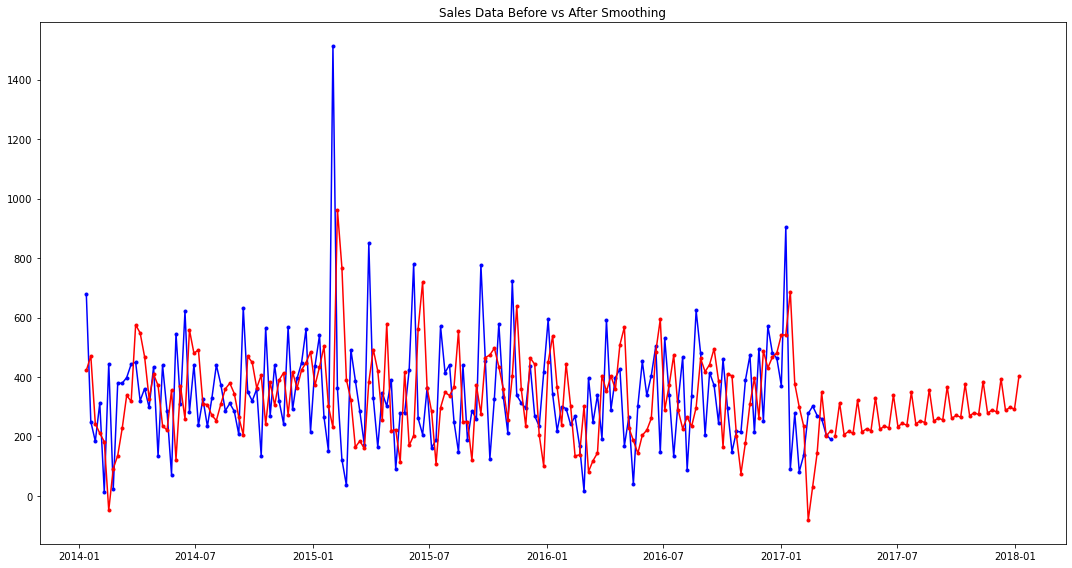

In [208]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(train.Sales,marker = '.',c = 'blue')
plt.plot(tri_pred,marker = '.',c = 'red')
plt.plot(tri_fore,marker = '.',c = 'red')
plt.title('Sales Data Before vs After Smoothing')

# plt.subplot(122)
# plt.plot(test,marker = '.',c = 'blue')
# plt.plot(test_new,marker = '.',c = 'red')
# plt.title('Test Data')


plt.tight_layout()
plt.show()

* The chart show the **smoothened data using Triple Exp Smoothing** of Sales data
* Lot of sharp peaks is reduced and smoothened 

### Checking for Stationarity

In [197]:
def check_station(data):
    d = adfuller(data)[1] # We are interested in the second value (p value)
    if d < 0.05:
        p = print(f'The prob {adfuller(data)[1]} is less than 0.05, The data is stationary')
    if d > 0.05:
        p = print(f'The prob {adfuller(data)[1]} is more than 0.05, The data is not stationary')
        
    return p

In [198]:
# For checking Train stationarity
check_station(df_week.Sales)

The prob 8.124101346205004e-22 is less than 0.05, The data is stationary


In [31]:
# # For checking Test stationarity
# check_station(test_new)

### Plotting the ACF and PACF 

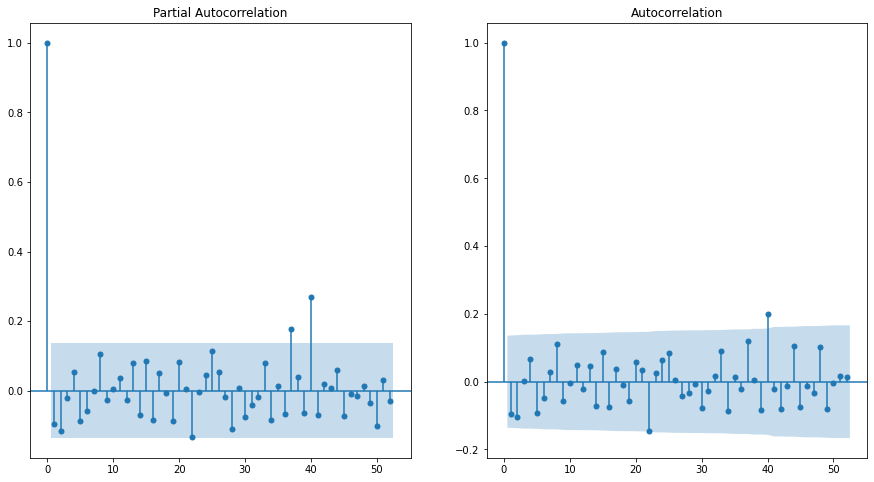

In [200]:
# plotting using plot_acf function
fig,ax = plt.subplots(1,2,figsize = (15,8))

# PACF
plot_pacf(df_week.Sales,lags=52,ax = ax[0])

#ACF
plot_acf(df_week.Sales,lags=52,ax = ax[1])


plt.show()

* The **PACF (Partial Autocorrelation)** give us the **P value**
* **P value** is at the **range of 3**
* **The ACF (AutoCorrelation)** gives us **Q value**
* **Q value** is at the range of **2**

### Splitting the data With the ratio

In [209]:
ratio = int(0.8*len(data))
train = df_week.iloc[:ratio]
test = df_week.iloc[ratio:]

print(f'Train = {train.shape} | Test = {test.shape}')

Train = (167, 6) | Test = (41, 6)


* The ratio is set to **80:20 ; Train:test** and the data is split from the data

### ARMA Model

### Finding the best p and q values for ARMA Model

In [128]:
# Finding the best p and q value by finding the least error value

def all_models(data,model_name):
    p = np.arange(3)
    q = np.arange(2)
    
    models = []
    p_l = []
    q_l = []
    mse = []
    rmse =[]
    mae = []
    aic = []
    bic = []
    mad = []
    mape = []
    d = 0
    if model_name.lower() == 'arma':
        for i in p:
            for j in q:
                try:
                    m = ARIMA(data,order = (i,d,j)).fit()
                    f = m.predict(start=len(train),end = len(train)+len(test)-1)
                    aic.append(m.aic)
                    bic.append(m.bic)
                    
                    mse.append(mean_squared_error(test.Sales,f))
                    rmse.append(np.sqrt(mean_squared_error(test.Sales,f)))
                    mae.append(mean_absolute_error(test.Sales,f))
                    models.append(m)
                    p_l.append(i)
                    q_l.append(j)
                except:
                    pass
                
    if model_name.lower() == 'sarima':
         for i in p:
            for j in q:
                try:
                    m = SARIMAX(data,order=(i,d,j),seasonal_order=(i,d,j,4)).fit()
                    f = m.predict(start=len(train),end = len(train)+len(test)-1)
                    aic.append(m.aic)
                    bic.append(m.bic)
                    mse.append(mean_squared_error(test.Sales,f))
                    rmse.append(np.sqrt(mean_squared_error(test.Sales,f)))
                    mae.append(mean_absolute_error(test.Sales,f))
                    models.append(m)
                    p_l.append(i)
                    q_l.append(j)

                except:
                    pass
    if model_name.lower() == 'sarimax':
        for i in p:
            for j in q:
                try:
                    m = SARIMAX(data,order=(i,d,j),seasonal_order=(i,d,j,4),exog =exog_train.values).fit()
                    f = m.predict(start=len(train),end = len(train)+len(test)-1,exog =exog_test.values )
                    aic.append(m.aic)
                    bic.append(m.bic)
                    mse.append(mean_squared_error(test.Sales,f))
                    rmse.append(np.sqrt(mean_squared_error(test.Sales,f)))
                    mae.append(mean_absolute_error(test.Sales,f))
                    models.append(m)
                    p_l.append(i)
                    q_l.append(j)

                except:
                    pass
                           
    d = pd.DataFrame({ 
                        'P':p_l,
                        'Q':q_l,
                        'AIC':aic,
                        'BIC':bic,
                        'MAE':mae,
                        'MSE':mse,
                        'RMSE':rmse})
        
    return (d)

* The above function is used to find the **best models in terms of lowest error rate**
* The functions includes the all the models including **ARMA,SARIMA,SARIMAX**

In [210]:
met = all_models(data,'arma')
met.sort_values(by = 'RMSE')

,P,Q,AIC,BIC,MAE,MSE,RMSE
0,0,0,2063.493870,2070.178539,110.794322,21096.233942,145.245427
1,0,1,2031.801916,2041.828919,111.837176,21489.458207,146.592831
5,2,1,1949.402779,1966.114450,112.434032,21548.559119,146.794275
4,2,0,1972.347340,1985.716677,112.801156,21831.992291,147.756530
2,1,0,2000.935052,2010.962055,112.839122,21864.040795,147.864941
3,1,1,1966.074197,1979.443534,113.597254,22379.929747,149.599230


In [219]:
# Building ARMA model
p = 0; d= 0; q=1
arma = ARIMA(data,order = (p,d,q)).fit()

# Arma prediction
arma_pred = arma.predict(start=len(train),end = len(train)+len(test)-1)

In [220]:
# Checking the model goodness using lunch box tech

# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(arma.resid,lags=[4],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Reject H0. Bad model


### Visualizing the Actual and Predicted values of test data for ARMA

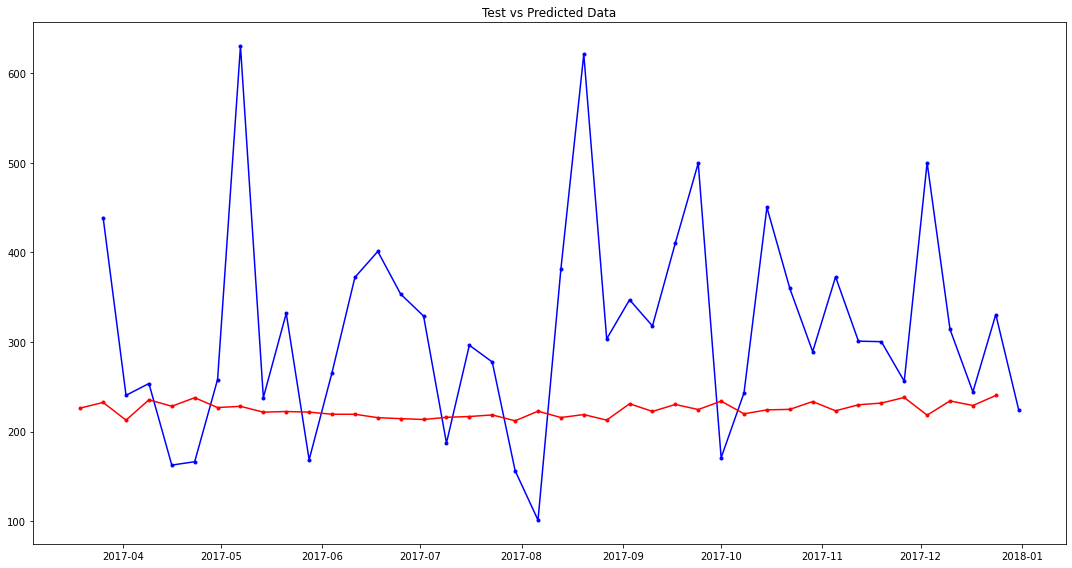

In [221]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(test.Sales,marker = '.',c = 'blue')
plt.plot(arma_pred,marker = '.',c = 'red')
plt.title('Test vs Predicted Data')


plt.tight_layout()
plt.show()

* The **predicted value doesnt match the actual value** 

In [222]:
### Summarizing the ARMA Model

arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:                     ARMA(0, 1)   Log Likelihood               -1012.901
Method:                       css-mle   S.D. of innovations             30.792
Date:                Mon, 08 Aug 2022   AIC                           2031.802
Time:                        18:41:08   BIC                           2041.829
Sample:                    01-05-2014   HQIC                          2035.856
                         - 12-31-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        225.9472      2.756     81.988      0.000     220.546     231.349
ma.L1.y        0.2953      0.046      6.414      0.000       0.205       0.386
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.3867           +0.0000j            3.3867            0.5000
-----------------------------------------------------------------------------
"""

### Building SARIMA model 

#### Finding the best model for SARIMA


In [255]:
met = all_models(train.Sales,'sarima')
met.sort_values(by = 'RMSE')

,P,Q,AIC,BIC,MAE,MSE,RMSE
3,1,1,2235.765996,2251.355965,90.894088,13140.252180,114.630939
5,2,1,2240.397848,2262.223805,87.965773,13248.529225,115.102256
4,2,0,2274.265759,2289.855728,174.481730,44001.784167,209.766022
2,1,0,2311.359169,2320.713150,247.790912,78738.010051,280.602940
1,0,1,2364.561329,2373.915311,304.773756,107245.806803,327.484056
0,0,0,2467.574596,2470.692590,313.805699,111860.851841,334.456054


In [256]:
### Building the model with least error rate
p = 1; d= 0; q=1

sarima = SARIMAX(data,order=(p,d,q),seasonal_order=(p,d,q,4)).fit()
sarima_pred = sarima.predict(start=len(train),end = len(train)+len(test)-1)
sarima_pred

Order Date
2017-03-19    258.314709
2017-03-26    224.797247
2017-04-02    224.448107
2017-04-09    224.954532
2017-04-16    239.765721
2017-04-23    216.469305
2017-04-30    256.455298
2017-05-07    240.019400
2017-05-14    239.274185
2017-05-21    196.808347
2017-05-28    213.692380
2017-06-04    196.369117
2017-06-11    200.729296
2017-06-18    178.122833
2017-06-25    179.748154
2017-07-02    169.996136
2017-07-09    171.674836
2017-07-16    167.740284
2017-07-23    178.360155
2017-07-30    174.229420
2017-08-06    187.120613
2017-08-13    184.500169
2017-08-20    179.752235
2017-08-27    187.199528
2017-09-03    202.119883
2017-09-10    209.492826
2017-09-17    211.121366
2017-09-24    242.289338
2017-10-01    239.230268
2017-10-08    232.252758
2017-10-15    213.226459
2017-10-22    237.578241
2017-10-29    225.345883
2017-11-05    227.132329
2017-11-12    228.224342
2017-11-19    258.937949
2017-11-26    246.124481
2017-12-03    235.062209
2017-12-10    242.948529
2017-12-17    

In [245]:
# Checking the model goodness using lunch box tech

# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### Visualizing the Actual and Predicted values of test data for SARIMA

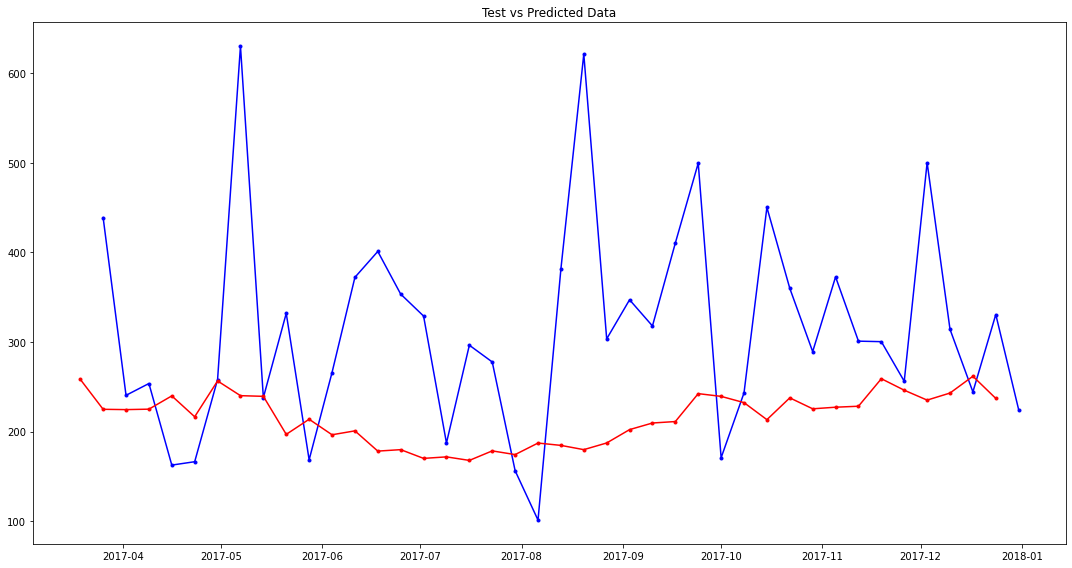

In [254]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(test.Sales,marker = '.',c = 'blue')
plt.plot(sarima_pred,marker = '.',c = 'red')
plt.title('Test vs Predicted Data')


plt.tight_layout()
plt.show()

* The **error rate of sarima is less than that of the arma** model but sarima also performs better

### Building SARIMAX model 

In [227]:
exog_train = df_week[['Quantity','Discount','Profit']]
exog_test  = df_week[['Quantity','Discount','Profit']]
exog_train = exog_train.iloc[:ratio]
exog_test = exog_test.iloc[ratio:]

* Using all the **required numerical features for the sarimax model** as exog funcion


#### Checking the best model among SARIMAX

In [228]:
met = all_models(train.Sales,'sarimax')
met.sort_values(by = 'RMSE')

,P,Q,AIC,BIC,MAE,MSE,RMSE
5,2,1,2197.875641,2229.055579,97.775654,15918.793685,126.169702
4,2,0,2195.527218,2220.471169,97.616441,16137.544668,127.033636
1,0,1,2193.696043,2212.404006,97.834261,16150.279871,127.083751
2,1,0,2194.109360,2212.817323,97.896573,16167.318606,127.150771
0,0,0,2191.772081,2204.244056,98.268052,16268.005357,127.546091
3,1,1,2193.130418,2218.074369,99.652629,16344.538341,127.845760


In [235]:
p = 2; d= 0; q=1

sarimax = SARIMAX(train.Sales,order=(p,d,q),seasonal_order=(p,d,q,4),exog =exog_train.values).fit()
                    
sarimax_pred = sarimax.predict(start=len(train),end = len(train)+len(test)-1,exog =exog_test.values)
sarima_pred

Order Date
2017-03-19    258.314709
2017-03-26    224.797247
2017-04-02    224.448107
2017-04-09    224.954532
2017-04-16    239.765721
2017-04-23    216.469305
2017-04-30    256.455298
2017-05-07    240.019400
2017-05-14    239.274185
2017-05-21    196.808347
2017-05-28    213.692380
2017-06-04    196.369117
2017-06-11    200.729296
2017-06-18    178.122833
2017-06-25    179.748154
2017-07-02    169.996136
2017-07-09    171.674836
2017-07-16    167.740284
2017-07-23    178.360155
2017-07-30    174.229420
2017-08-06    187.120613
2017-08-13    184.500169
2017-08-20    179.752235
2017-08-27    187.199528
2017-09-03    202.119883
2017-09-10    209.492826
2017-09-17    211.121366
2017-09-24    242.289338
2017-10-01    239.230268
2017-10-08    232.252758
2017-10-15    213.226459
2017-10-22    237.578241
2017-10-29    225.345883
2017-11-05    227.132329
2017-11-12    228.224342
2017-11-19    258.937949
2017-11-26    246.124481
2017-12-03    235.062209
2017-12-10    242.948529
2017-12-17    

In [236]:
# Checking the model goodness using lunch box tech

# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(sarimax.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### Visualizing the Catual and predicted for SARIMAX model

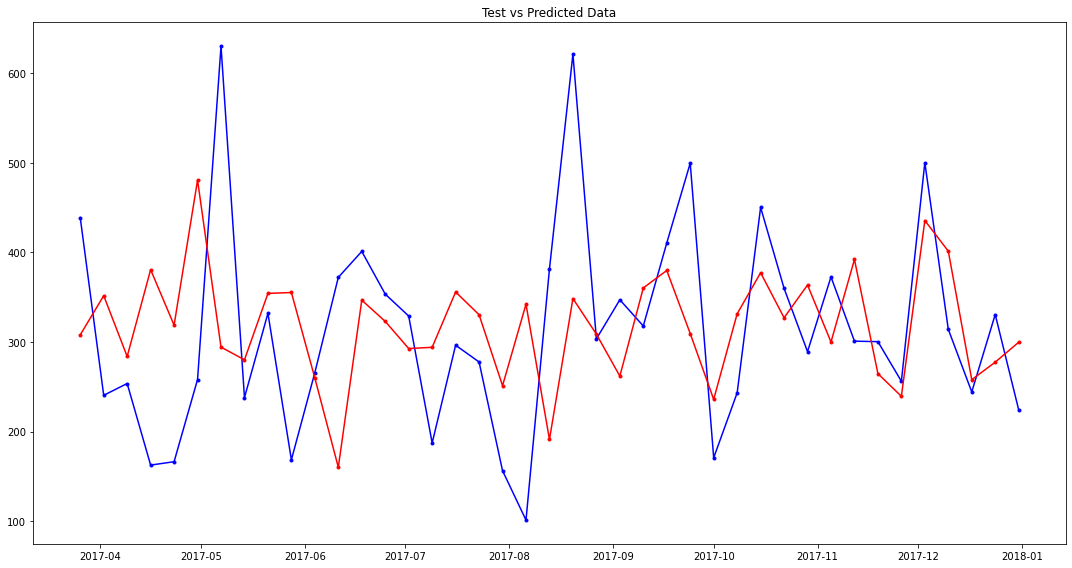

In [237]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(test.Sales,marker = '.',c = 'blue')
plt.plot(sarimax_pred,marker = '.',c = 'red')
plt.title('Test vs Predicted Data')


plt.tight_layout()
plt.show()

In [238]:
### Summarizing the sarimax model
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  167
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 4)   Log Likelihood               -1088.938
Date:                           Mon, 08 Aug 2022   AIC                           2197.876
Time:                                   18:43:16   BIC                           2229.056
Sample:                               01-12-2014   HQIC                          2210.531
                                    - 03-19-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            93.4177      6.761     13.817      0.000      80.166     106.669
x2          -106.7808    159.273     -0.670      0.503    -418.951     205.389
x3            -0.3275      0.131     -2.509      0.012      -0.583      -0.072
ar.L1         -0.3503      1.120     -0.313      0.755      -2.546       1.845
ar.L2         -0.1294      0.125     -1.037      0.300      -0.374       0.115
ma.L1          0.2437      1.136      0.215      0.830      -1.983       2.471
ar.S.L4        0.9746      0.165      5.904      0.000       0.651       1.298
ar.S.L8        0.0219      0.128      0.171      0.864      -0.229       0.273
ma.S.L4       -0.9843      0.254     -3.874      0.000      -1.482      -0.486
sigma2      2.754e+04   4650.911      5.921      0.000    1.84e+04    3.67e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               109.80
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.94
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Comparing all the models

### Comparing all the models based on visuals

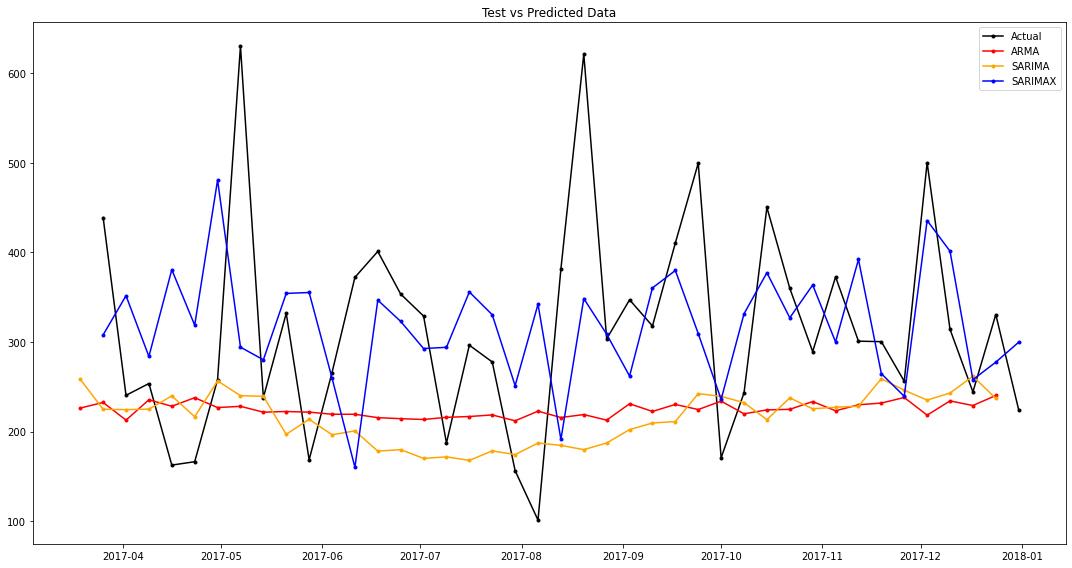

In [250]:
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(test.Sales,marker = '.',c = 'black',label = 'Actual')
plt.plot(arma_pred,marker = '.',c = 'red',label = 'ARMA')
plt.plot(sarima_pred,marker = '.',c = 'orange',label = 'SARIMA')
plt.plot(sarimax_pred,marker = '.',c = 'blue',label = 'SARIMAX')
plt.title('Test vs Predicted Data')
plt.legend()

plt.tight_layout()
plt.show()

* From the graph we can see that **sarimax model performs better than arma and sarima**


### Comaparing all the Models based on Error Metrics

In [240]:

def metrics(models):
    mod = []
    mse = []
    rmse =[]
    aic = []
    bic = []
    mad = []
    mape = []
    
    d = 0
    for i in models:
        if i.lower() == 'arma':
            m = arma
            f = m.predict(start=len(train),end = len(train)+len(test)-1)
            error = data-f
            ab_err = abs(error)
            ab_per_err = abs((ab_err/data)*100)
            mad_1 = np.mean(ab_err)
            mape_1 = np.mean(ab_per_err)
            
            
    
            mad.append(mad_1)
            mape.append(mape_1)
            aic.append(m.aic)
            bic.append(m.bic)
            mse.append(mean_squared_error(test.Sales,f))
            rmse.append(np.sqrt(mean_squared_error(test.Sales,f)))
            mod.append(i)

        elif i.lower() == 'sarima':
             
            m = sarima
            f = m.predict(start=len(train),end = len(train)+len(test)-1)
            error = data-f
            ab_err = abs(error)
            ab_per_err = abs((ab_err/data)*100)
            mad_1 = np.mean(ab_err)
            mape_1 = np.mean(ab_per_err)
            
            mad.append(mad_1)
            mape.append(mape_1)
            aic.append(m.aic)
            bic.append(m.bic)
            mse.append(mean_squared_error(test.Sales,f))
            rmse.append(np.sqrt(mean_squared_error(test.Sales,f)))
            mod.append(i)

  
        elif i.lower() == 'sarimax':
        
        
            m = sarimax
            f = m.predict(start=len(train),end = len(train)+len(test)-1,exog =exog_test.values )
            error = data-f
            ab_err = abs(error)
            ab_per_err = abs((ab_err/data)*100)
            mad_1 = np.mean(ab_err)
            mape_1 = np.mean(ab_per_err)
            
            mad.append(mad_1)
            mape.append(mape_1)
            aic.append(m.aic)
            bic.append(m.bic)
            mse.append(mean_squared_error(test.Sales,f))
            rmse.append(np.sqrt(mean_squared_error(test.Sales,f)))
            mod.append(i)


                           
    d = pd.DataFrame({ 'Models':mod,
                        'MAD':mad,
                        'MAPE':mape,
                        'AIC':aic,
                        'BIC':bic,
                        'MSE':mse,
                        'RMSE':rmse})
        
    return (d)

In [247]:
models = ['arma','sarima','sarimax']
er = metrics(models)
er.sort_values('RMSE',ascending=True)

,Models,MAD,MAPE,AIC,BIC,MSE,RMSE
2,sarimax,103.055812,49.097621,2197.875641,2229.055579,15918.793685,126.169702
0,arma,24.128836,11.611193,2031.801916,2041.828919,21489.458207,146.592831
1,sarima,16.855334,7.787852,1913.914794,1930.626466,23069.915559,151.887839


* The **lowest error rate** is from the **arma model**
* Hence we can say that the **arma is better in terms of error rate**

In [155]:
# Comparing the values in a dataframe
df_pred = pd.DataFrame({'Actual':test.Sales,
                       'ARMA':arma_pred,
                       'SARIMA':sarima_pred,
                       'SARIMAX':sarimax_pred})
df_pred

,Actual,ARMA,SARIMA,SARIMAX
2017-03-19,155.766162,226.002517,260.586258,218.363473
2017-03-26,484.383500,226.002517,224.934132,306.731871
2017-04-02,287.338878,226.002517,233.875457,238.161699
2017-04-09,296.090500,226.002517,238.470918,213.086910
2017-04-16,94.053532,226.002517,251.387237,190.885370
2017-04-23,170.503404,226.002517,218.002944,171.939189
2017-04-30,109.670732,226.002517,262.729000,186.349735
2017-05-07,235.735568,226.002517,235.070150,228.417788
2017-05-14,209.454203,226.002517,241.788312,232.577801
2017-05-21,182.126267,226.002517,203.959115,229.488126


### Comparing the Models based on Future Forecasting 

In [248]:
arma_fore = arma.predict(start = len(train),end = len(train)+len(test)+20)
arma_fore = arma_fore.tail(21)
sarima_fore = sarima.predict(start = len(train),end = len(train)+len(test)+20)
sarima_fore = sarima_fore.tail(21)
# sarimax_fore = sarimax.predict(start = len(train),end = len(train)+len(test)+20,exog = exog_test.values)

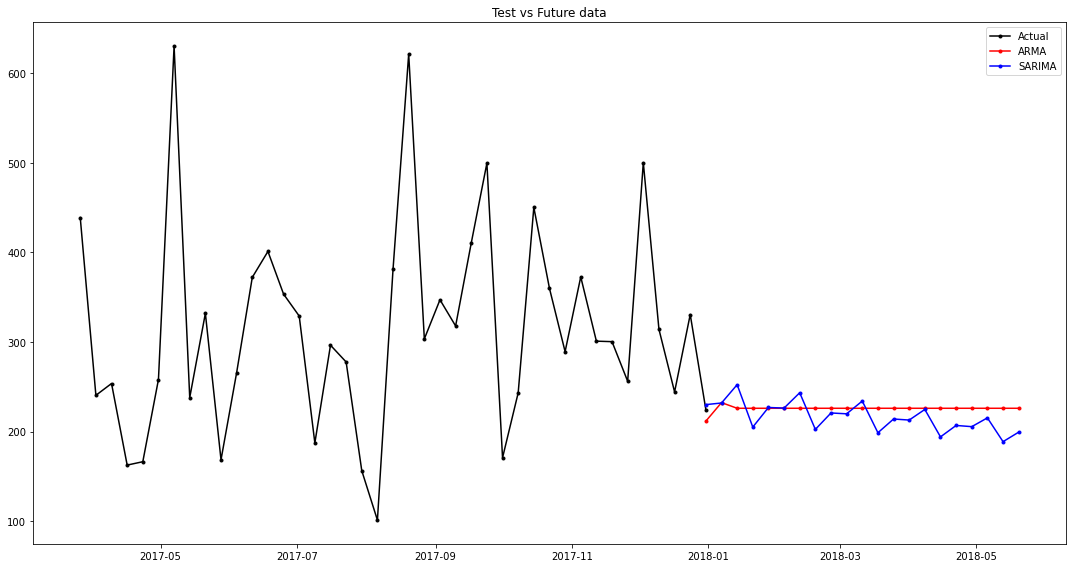

In [249]:
### Comparing all the models based on visuals
fig,ax = plt.subplots(figsize = (15,8))

plt.subplot(111)
plt.plot(test.Sales,marker = '.',c = 'black',label = 'Actual')
plt.plot(arma_fore,marker = '.',c = 'red',label = 'ARMA')
plt.plot(sarima_fore,marker = '.',c = 'blue',label = 'SARIMA')
# plt.plot(sarimax_pred,marker = '.',c = 'blue',label = 'SARIMAX')
plt.title('Test vs Future data')
plt.legend()

plt.tight_layout()
plt.show()

* The above plot shows the **future forecast of the Sales data**
* Two models **ARMA and SARIMA** is used to predict the **future data**

#### Interpretation:

* The time series analysis to **forecast Sales** data is carried out 
* Here **Univariate analysis of time series data** is done with previous **sales** data to predict the future sales data
* Initially the data is converted to **Week data** to make it sequential
* Then **various models** are applied for the univariate analysis
* Various models like **ARMA,SARIMA,SARIMAX** is used to forecast the Sales
* **Initially smoothing** is carried out and used for the prediction of future data

* Hence for this forecast and analysis we can conclude that the **SARIMAX model** perform better than other models